In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
result_tket = pd.read_csv('./result_uccsd_tket.csv')
result_paulihedral = pd.read_csv('./result_uccsd_paulihedral.csv')
result_tetris = pd.read_csv('./result_uccsd_tetris.csv')
result_phoenix = pd.read_csv('./result_uccsd_phoenix.csv')


In [16]:
num_programs = len(result_tket)
programs = result_tket['program']
num_2q_gates = result_tket['num_2q_gates']
depth_2q = result_tket['depth_2q']

In [17]:
result_phoenix

,program,num_qubits,num_gates,num_2q_gates,depth,depth_2q,num_gates(all2all),num_2q_gates(all2all),depth(all2all),depth_2q(all2all),num_gates(manhattan),num_2q_gates(manhattan),depth(manhattan),depth_2q(manhattan),num_gates(sycamore),num_2q_gates(sycamore),depth(sycamore),depth_2q(sycamore)
0,CH2_cmplt_BK_sto3g,14,37780,19574,23568,19399,9004,4198,5862,3488,22067,14757,13505,10316,16385,10153,10397,7542
1,CH2_cmplt_JW_sto3g,14,34280,21072,23700,19749,8978,4200,5758,3463,23616,15686,13765,10494,17395,10731,10830,7849
2,CH2_cmplt_P_sto3g,14,40198,20514,24893,20455,10747,5517,7020,4703,30510,22087,17693,14093,21472,14570,13016,10044
3,CH2_frz_BK_sto3g,12,19880,10228,12559,10174,4853,2246,3162,1885,11355,7292,7233,5394,8465,5224,5527,4001
4,CH2_frz_JW_sto3g,12,17658,10344,11914,9706,4866,2217,3148,1859,11412,7131,7162,5298,8820,5256,5574,3971
5,CH2_frz_P_sto3g,12,19532,9938,12346,9889,5349,2556,3361,2088,14436,9846,8763,6767,10660,6840,6861,5172
6,H2O_cmplt_BK_sto3g,14,25238,13108,15797,12976,6206,2921,4094,2454,15670,10541,9423,7208,11354,6994,7131,5159
7,H2O_cmplt_JW_sto3g,14,23210,14360,16264,13576,6053,2848,3936,2369,15477,10262,9342,7131,11639,7161,7462,5397
8,H2O_cmplt_P_sto3g,14,27467,14020,16929,13955,7403,3731,4756,3102,24011,17665,13799,11164,16257,11142,9976,7801
9,H2O_frz_BK_sto3g,12,15624,8004,9691,7934,3230,1408,2070,1176,6781,4135,4218,3045,5290,3117,3478,2475


### All2all topology

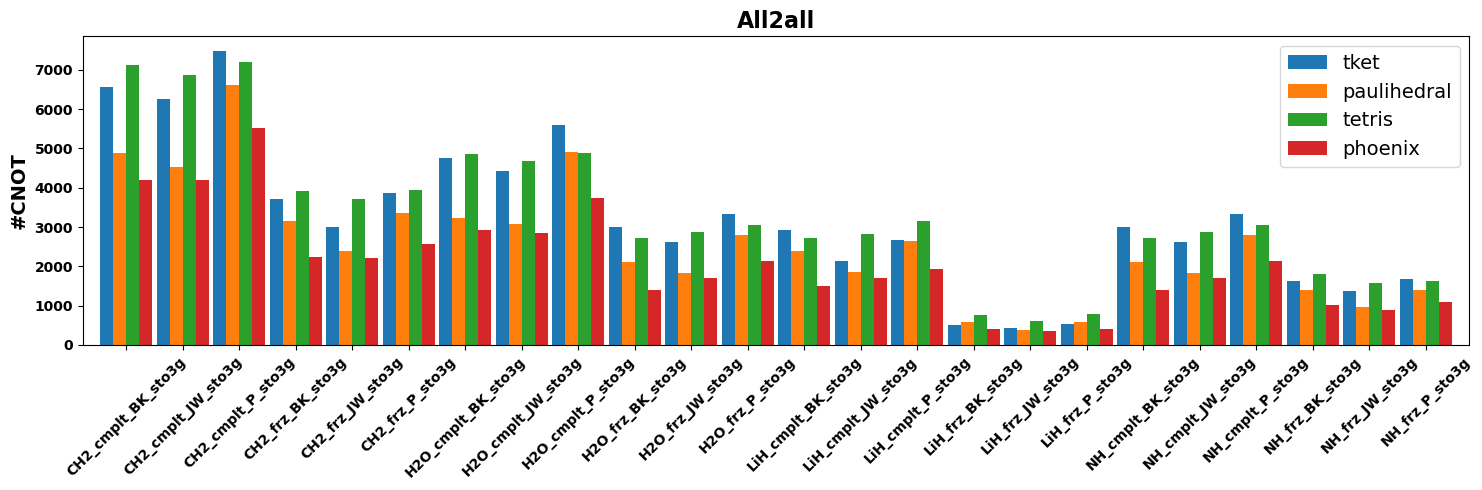

In [18]:
# num_2q_gates
plt.figure(figsize=(15, 5))
width = 0.23
plt.bar(np.arange(num_programs) - width * 1.5, result_tket['num_2q_gates(all2all)'], width=width, label='tket')
plt.bar(np.arange(num_programs) - width * 0.5, result_paulihedral['num_2q_gates(all2all)'], width=width, label='paulihedral')
plt.bar(np.arange(num_programs) + width * 0.5, result_tetris['num_2q_gates(all2all)'], width=width, label='tetris')
plt.bar(np.arange(num_programs) + width * 1.5, result_phoenix['num_2q_gates(all2all)'], width=width, label='phoenix')
plt.xticks(np.arange(num_programs), programs, rotation=45, fontweight='bold')
plt.xlim(width - 1, num_programs - width)
plt.ylabel('#CNOT', fontsize=14, fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(fontsize=14)
plt.title('All2all', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

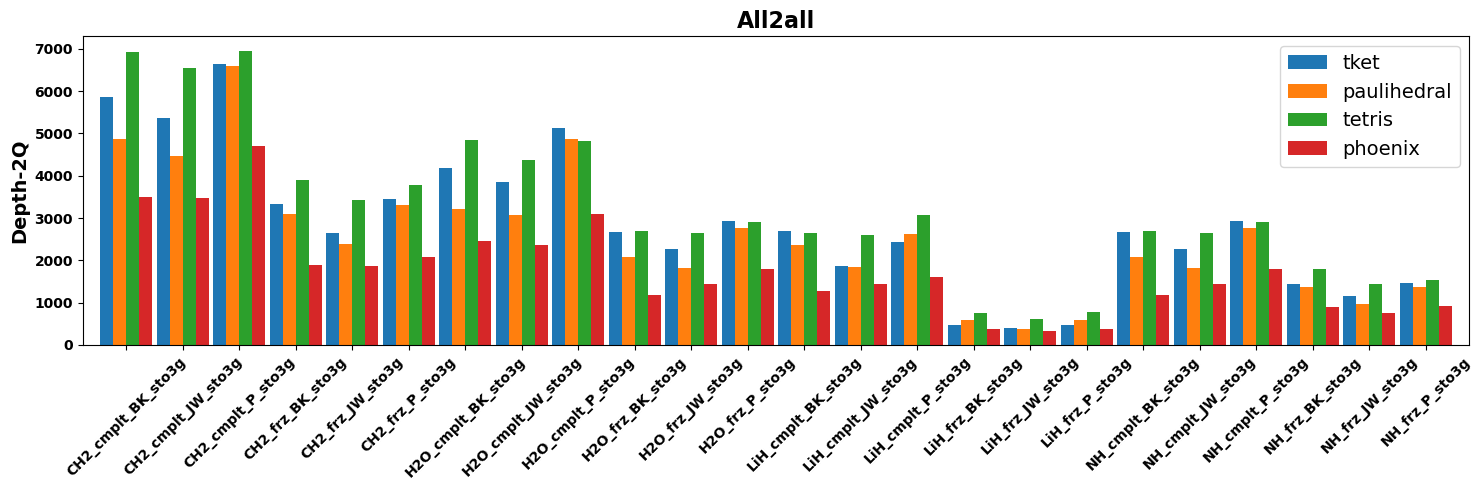

In [20]:
# depth_2q
plt.figure(figsize=(15, 5))
width = 0.23
plt.bar(np.arange(num_programs) - width * 1.5, result_tket['depth_2q(all2all)'], width=width, label='tket')
plt.bar(np.arange(num_programs) - width * 0.5, result_paulihedral['depth_2q(all2all)'], width=width, label='paulihedral')
plt.bar(np.arange(num_programs) + width * 0.5, result_tetris['depth_2q(all2all)'], width=width, label='tetris')
plt.bar(np.arange(num_programs) + width * 1.5, result_phoenix['depth_2q(all2all)'], width=width, label='phoenix')
plt.xticks(np.arange(num_programs), programs, rotation=45, fontweight='bold')
plt.xlim(width - 1, num_programs - width)
plt.ylabel('Depth-2Q', fontsize=14, fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(fontsize=14)
plt.title('All2all', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Manhattan

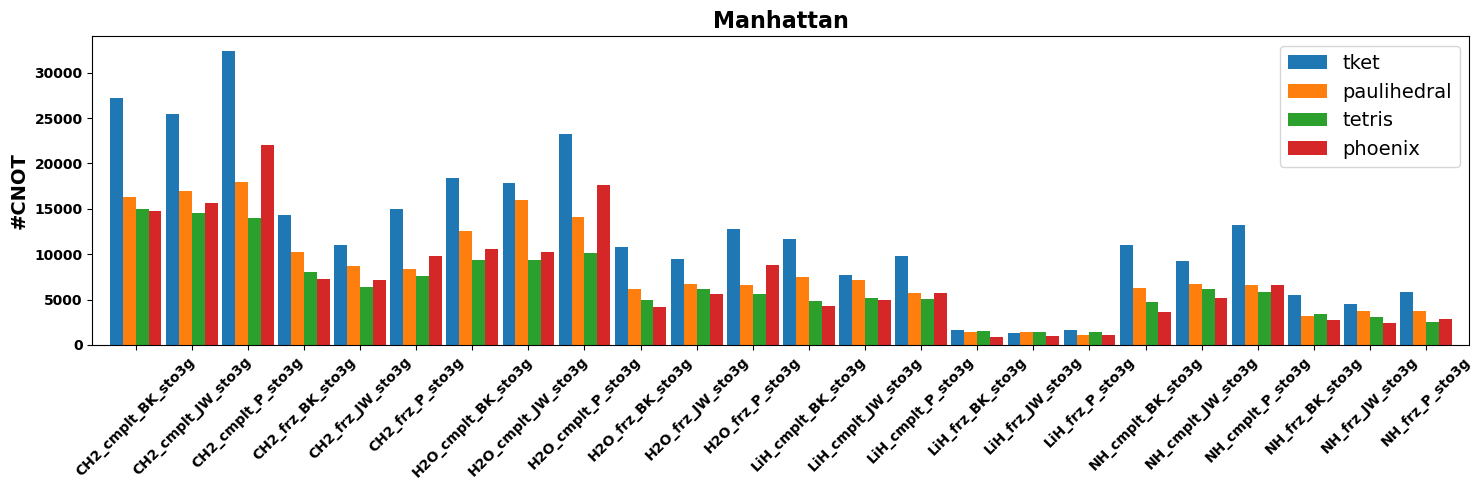

In [21]:
# num_2q_gates
plt.figure(figsize=(15, 5))
width = 0.23
plt.bar(np.arange(num_programs) - width * 1.5, result_tket['num_2q_gates(manhattan)'], width=width, label='tket')
plt.bar(np.arange(num_programs) - width * 0.5, result_paulihedral['num_2q_gates(manhattan)'], width=width, label='paulihedral')
plt.bar(np.arange(num_programs) + width * 0.5, result_tetris['num_2q_gates(manhattan)'], width=width, label='tetris')
plt.bar(np.arange(num_programs) + width * 1.5, result_phoenix['num_2q_gates(manhattan)'], width=width, label='phoenix')
plt.xticks(np.arange(num_programs), programs, rotation=45, fontweight='bold')
plt.xlim(width - 1, num_programs - width)
plt.ylabel('#CNOT', fontsize=14, fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(fontsize=14)
plt.title('Manhattan', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

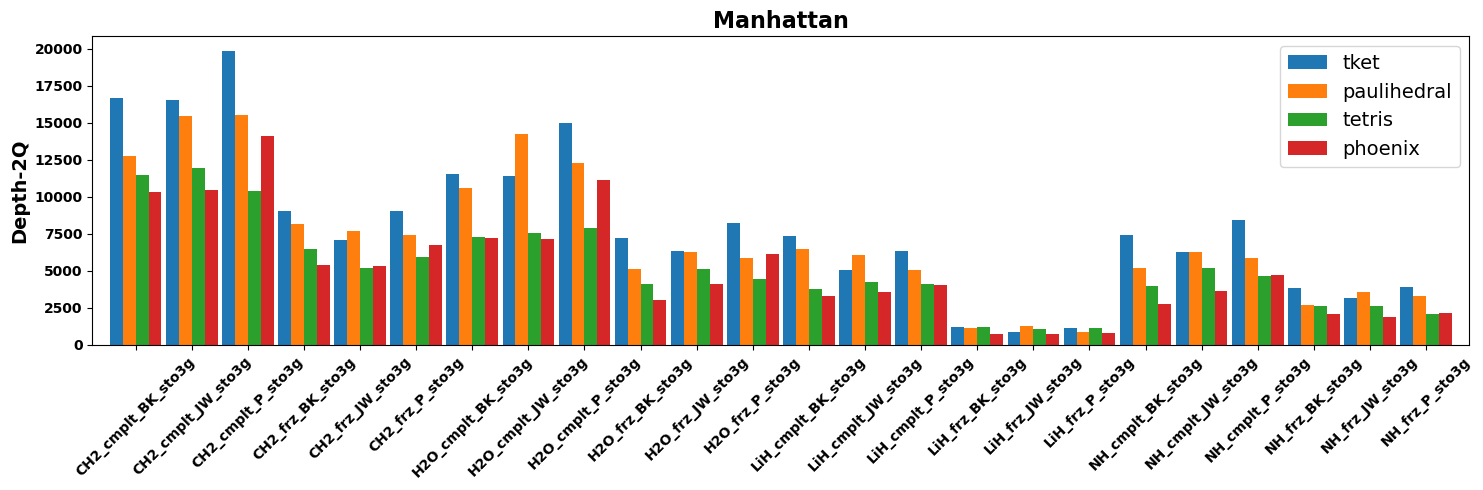

In [23]:
# depth_2q
plt.figure(figsize=(15, 5))
width = 0.23
plt.bar(np.arange(num_programs) - width * 1.5, result_tket['depth_2q(manhattan)'], width=width, label='tket')
plt.bar(np.arange(num_programs) - width * 0.5, result_paulihedral['depth_2q(manhattan)'], width=width, label='paulihedral')
plt.bar(np.arange(num_programs) + width * 0.5, result_tetris['depth_2q(manhattan)'], width=width, label='tetris')
plt.bar(np.arange(num_programs) + width * 1.5, result_phoenix['depth_2q(manhattan)'], width=width, label='phoenix')
plt.xticks(np.arange(num_programs), programs, rotation=45, fontweight='bold')
plt.xlim(width - 1, num_programs - width)
plt.ylabel('Depth-2Q', fontsize=14, fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(fontsize=14)
plt.title('Manhattan', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


### Sycamore

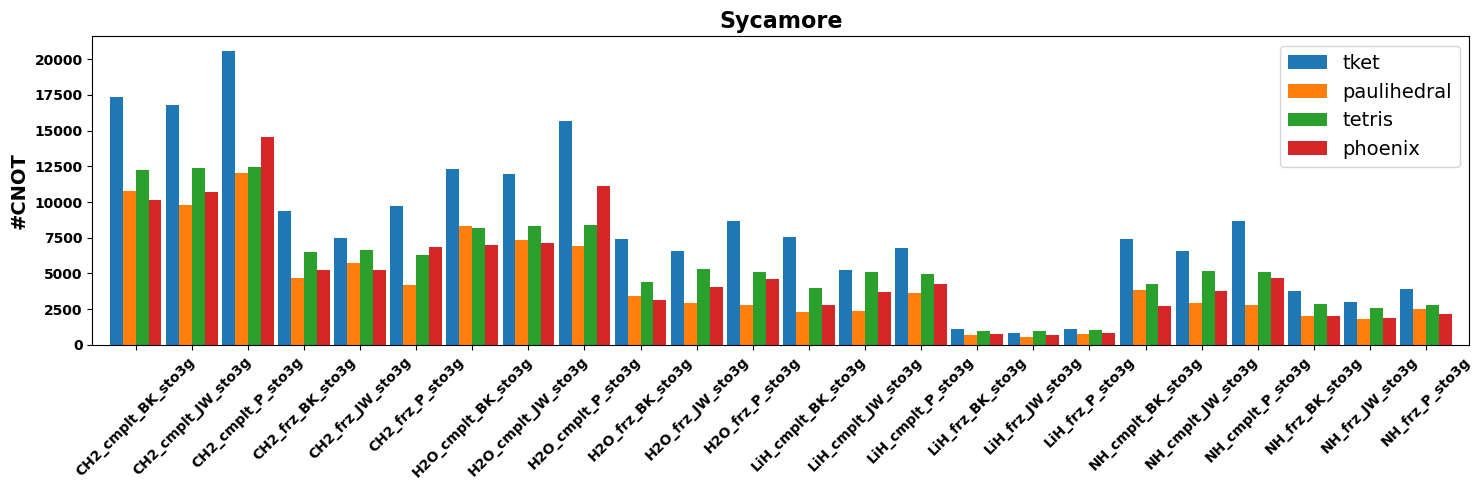

In [24]:
# num_2q_gates
plt.figure(figsize=(15, 5))
width = 0.23
plt.bar(np.arange(num_programs) - width * 1.5, result_tket['num_2q_gates(sycamore)'], width=width, label='tket')
plt.bar(np.arange(num_programs) - width * 0.5, result_paulihedral['num_2q_gates(sycamore)'], width=width, label='paulihedral')
plt.bar(np.arange(num_programs) + width * 0.5, result_tetris['num_2q_gates(sycamore)'], width=width, label='tetris')
plt.bar(np.arange(num_programs) + width * 1.5, result_phoenix['num_2q_gates(sycamore)'], width=width, label='phoenix')
plt.xticks(np.arange(num_programs), programs, rotation=45, fontweight='bold')
plt.xlim(width - 1, num_programs - width)
plt.ylabel('#CNOT', fontsize=14, fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(fontsize=14)
plt.title('Sycamore', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

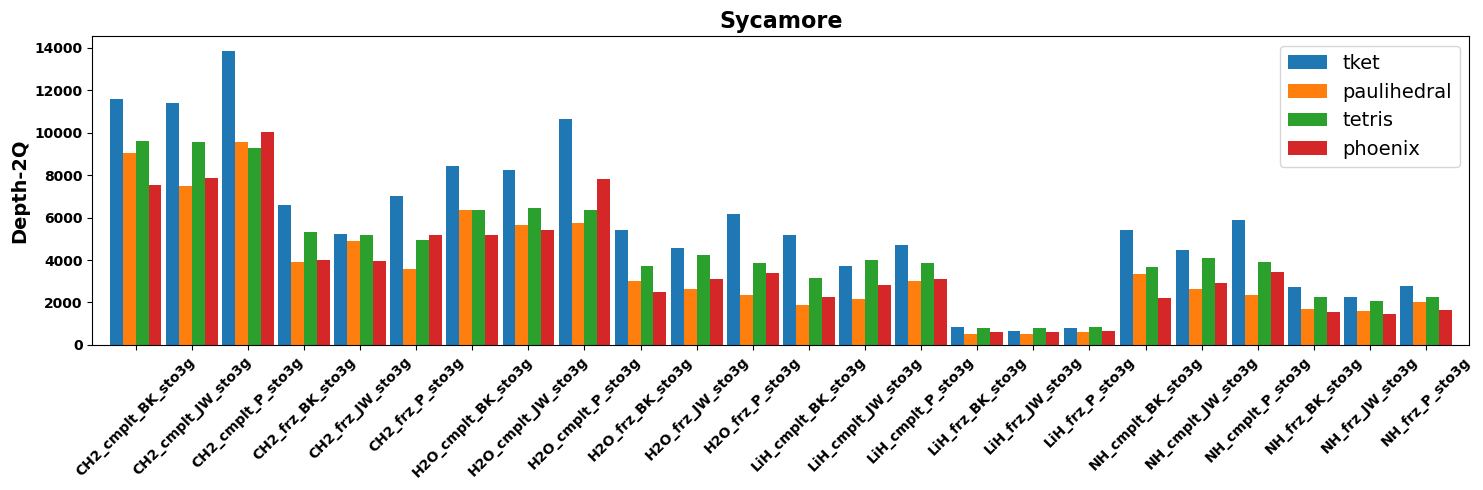

In [26]:
# depth_2q
plt.figure(figsize=(15, 5))
width = 0.23
plt.bar(np.arange(num_programs) - width * 1.5, result_tket['depth_2q(sycamore)'], width=width, label='tket')
plt.bar(np.arange(num_programs) - width * 0.5, result_paulihedral['depth_2q(sycamore)'], width=width, label='paulihedral')
plt.bar(np.arange(num_programs) + width * 0.5, result_tetris['depth_2q(sycamore)'], width=width, label='tetris')
plt.bar(np.arange(num_programs) + width * 1.5, result_phoenix['depth_2q(sycamore)'], width=width, label='phoenix')
plt.xticks(np.arange(num_programs), programs, rotation=45, fontweight='bold')
plt.xlim(width - 1, num_programs - width)
plt.ylabel('Depth-2Q', fontsize=14, fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(fontsize=14)
plt.title('Sycamore', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [93]:
result_tetris['num_2q_gates(sycamore)']

0      9841
1     10448
2      9522
3      5731
4      5429
5      4861
6      6887
7      6994
8      6645
9      3988
10     4239
11     4244
12     3586
13     4263
14     4110
15      999
16      880
17     1004
18     3988
19     4239
20     4244
21     2621
22     2302
23     2344
Name: num_2q_gates(sycamore), dtype: int64

In [94]:
['num_2q_gates(sycamore)']

0      9841
1     10448
2      9522
3      5731
4      5429
5      4861
6      6887
7      6994
8      6645
9      3988
10     4239
11     4244
12     3586
13     4263
14     4110
15      999
16      880
17     1004
18     3988
19     4239
20     4244
21     2621
22     2302
23     2344
Name: num_2q_gates(sycamore), dtype: int64